Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[1, 3.25]]


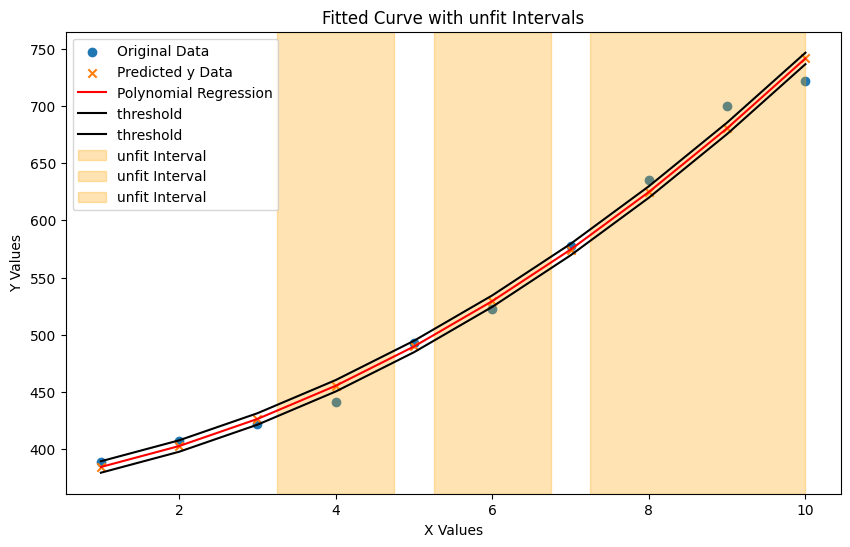

MAIN interval list from VAL: [[3.25, 4.75], [5.25, 6.75], [7.25, 10]]
Simulator...
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
Running sumo simulator
 Retrying in 1 seconds
MAIN modx [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Validator...
What are POINTS  [[1, 388.8888888888889], [2, 407.5972222222223], [3, 422.25], [4, 441.27777777777777], [5, 492.68055555555554], [6, 522.5972222222222], [7, 577.8333333333333], [8, 635.0277777777777], [9, 699.5972222222224], [10, 722.0694444444445], [4, 441.27777777777777], [6, 522.5972222222222], [8, 635.0277777777777], [9, 699.5972222222224], [10, 722.0694444444445]]
       *** USING local_explora

/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

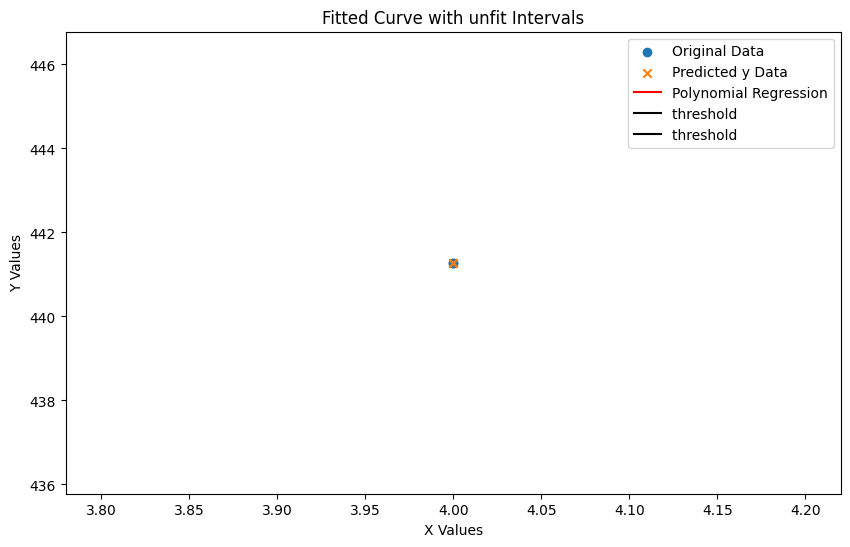

equation,
 y =  0.0001683341132269966x^9 + 0.0006733364529079863x^8 + 0.002693345811631945x^7 + 0.01077338324652778x^6 + 0.04309353298611112x^5 + 0.17237413194444448x^4 + 0.6894965277777779x^3 + 2.7579861111111117x^2 + 11.031944444444447x^1 + 44.12777777777779 
unfit_points
 [(4, 441.27777777777777), (4, 441.27777777777777)] 
local_unfit_interval
, [[3.25, 4.75]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

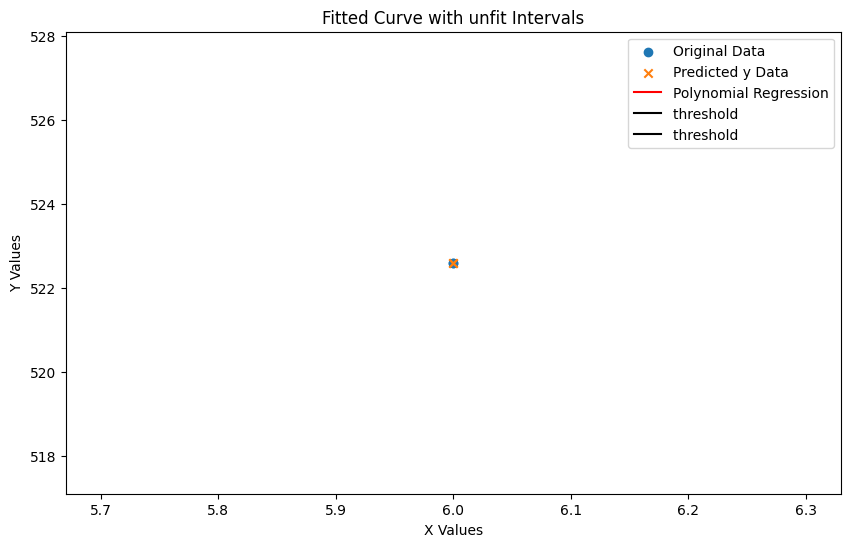

equation,
 y =  5.18568155084478e-06x^9 + 3.1114089305068664e-05x^8 + 0.00018668453583041197x^7 + 0.0011201072149824723x^6 + 0.006720643289894834x^5 + 0.040323859739368986x^4 + 0.24194315843621392x^3 + 1.4516589506172841x^2 + 8.709953703703706x^1 + 52.2597222222222 
unfit_points
 [(6, 522.5972222222222), (6, 522.5972222222222)] 
local_unfit_interval
, [[5.25, 6.75]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:41: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebook

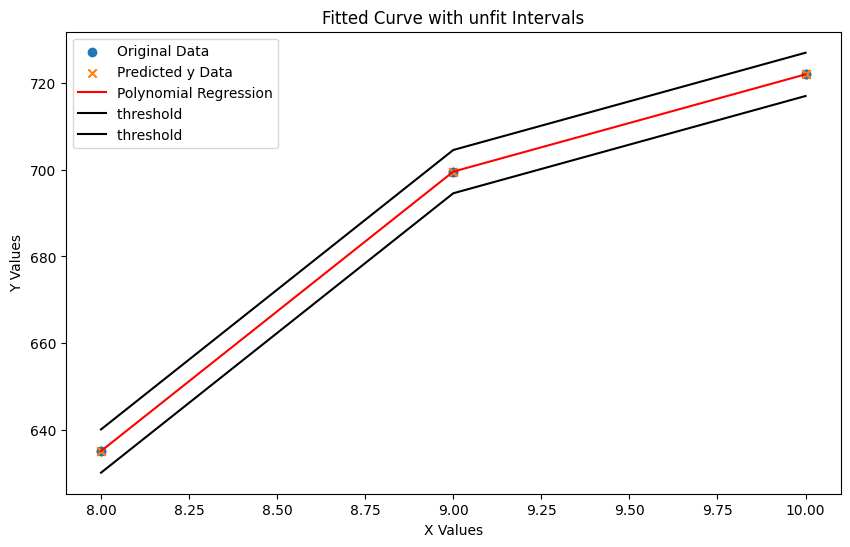

equation,
 y =  -1.0571574579111181e-07x^9  -7.415001381319872e-07x^8  -3.778731050876616e-06x^7 + 3.1499328464830676e-06x^6 + 0.0004786093157690206x^5 + 0.009477445290958952x^4 + 0.14144638945341714x^3 + 1.8466805982857484x^2 + 22.088846623011573x^1 + 246.93428171243912 
unfit_points
 [(8, 635.0277777777777), (8, 635.0277777777777), (9, 699.5972222222224), (9, 699.5972222222224), (10, 722.0694444444445), (10, 722.0694444444445)] 
local_unfit_interval
, [[7.25, 10]]
DIFFERENCES 
each_interval  [7.25, 10] 
new_unfit_interval   []
MAIN interval list from VAL: []


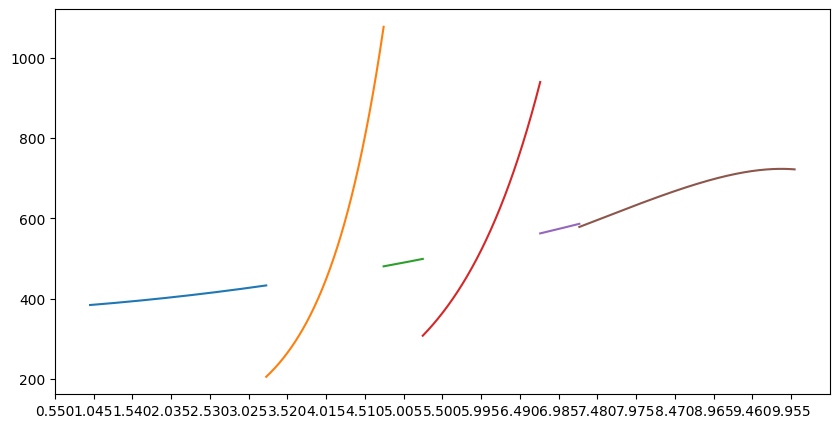

In [1]:
# IMPORT LIBRARIES
import numpy as np

from components_configuration import components
from global_settings import simexSettings,mds

from validator_controller import ValidatorController
from modifier_controller import ModifierController
from simulator_controller import SimulatorController
from logger_utils import Logger

validator_controller = ValidatorController()
logger = Logger()
logger_main_arguments = {}
is_main_func = True

# SUMO vsl
from controller_modifier_scenarios import Controller

# SUMO vsl generate modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
modlist = Controller.get_list_of_modifiers(10)
# print(f"Mod list: {modlist}")
# mod_x_list = modlist
while is_main_func:
    # Calls Simulator
    # Input: list of ids and modifiers [[1,[2900,...2900],[2,[3000,...3000]....]
    # Output: IDs,SIMULATED(values) [[1,388.88],[2,420.22]]
    # USE the sumo_simulator_vsl or sumo_simulator_novsl function such as components['sumo_simulator_novsl']
    mod_x,sim_y_list = SimulatorController.simulator(modlist,selected_simulator=components['sumo_simulator_vsl'])
    assert len(mod_x) == len(sim_y_list)

    print("MAIN modx", mod_x)

    # Calls Validator controller
    intervals_list =  validator_controller.validate(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list), selected_validator=components['validator'],global_interval=[1, 10])
    print("MAIN interval list from VAL:", intervals_list)
    
    # Updates interval_list to new range output from validator controller
    # No more unfit intervals -> write MAIN log
    if not intervals_list:
        is_main_func = False
        logger_main_arguments['log_contex'] = 'overall MAIN stats'
        logger_main_arguments['main_status'] = 'no unfit intervals'
        logger.log_main(logger_main_arguments)


# MAIN cycle completed/interrupted -> write OVERALL statistics        
logger_main_arguments['log_contex'] = 'Overall Stats'                          
logger_main_arguments['main_status'] = 'end cycle'
logger.log_main(logger_main_arguments)